In [5]:
import pandas as pd
df = pd.read_csv("netflix_titles.csv")
#df.head()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


In [6]:
df.isna().sum()

show_id            0
type               0
title              0
director        2634
cast             825
country          831
date_added        10
release_year       0
rating             4
duration           3
listed_in          0
description        0
dtype: int64

In [11]:
df_clean = df.dropna(subset=['director','cast','country','date_added','rating','duration'])

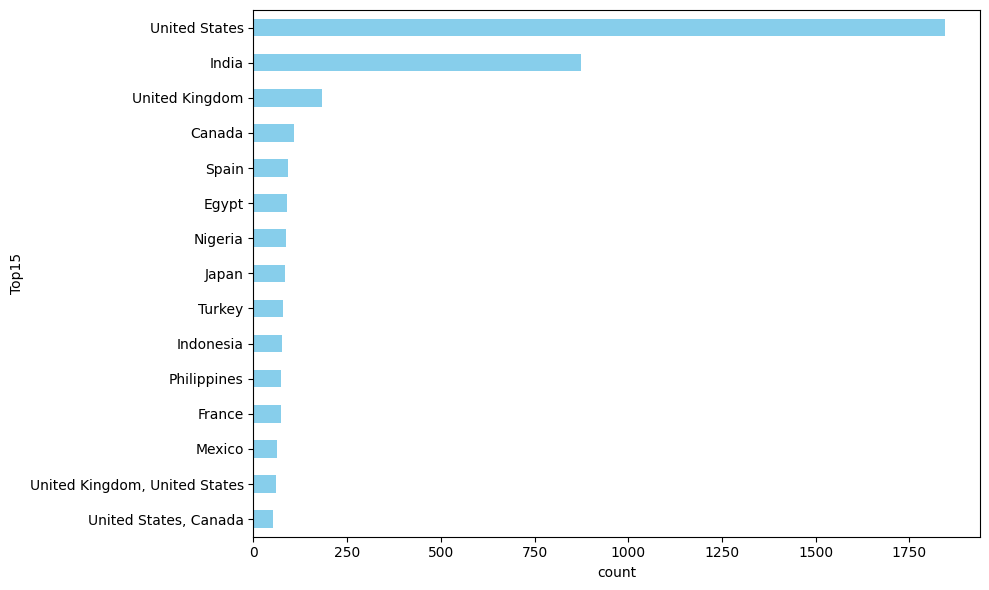

In [20]:
country_count = df_clean['country'].value_counts().head(15)

import matplotlib.pyplot as plt
plt.figure(figsize=(10,6))
country_count.plot(kind='barh',color='skyblue')
plt.xlabel('count')
plt.ylabel('Top15')
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()


In [29]:
text = ''.join(df['description'].dropna().str.lower())

import re
from collections import Counter
words = re.findall(r'\b[a-z]{4,}\b', text)
stopwords = set(['the', 'and', 'for', 'with', 'that', 'from', 'this', 'are', 'his', 'her', 'was', 'but', 'have', 'who', 'its', 'after', 'has', 'she', 'their'])
filtered_words = [word for word in words if word not in stopwords]

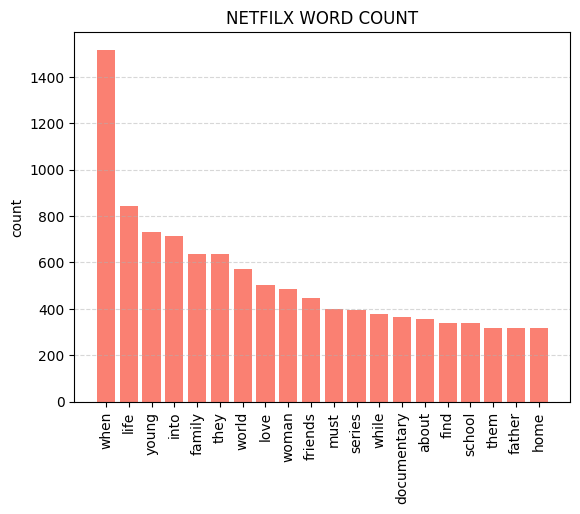

In [34]:
counter = Counter(filtered_words)
common_words = counter.most_common(20)

word,count = zip(*common_words)
plt.Figure(figsize=(10,6))
plt.bar(word,count,color='salmon')
plt.xticks(rotation=90)
plt.ylabel("count")
plt.title("NETFILX WORD COUNT")
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout
plt.show()

Text(0, 0.5, '')

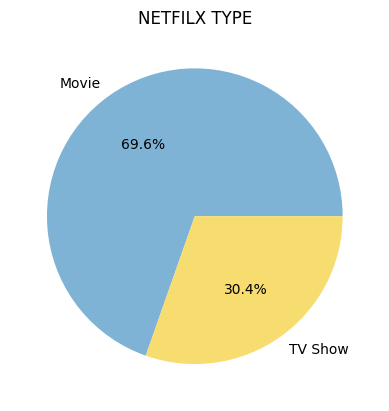

In [40]:
df['type'].value_counts().plot(kind='pie',autopct='%1.1f%%',colors=['#7FB3D5','#F7Dc6f'])
plt.title('NETFILX TYPE')
plt.ylabel('')
